## Loading the required modules 

In [138]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14,6)
from matplotlib.colors import ListedColormap

# SETTING THE DIRECTORY
import os
os.chdir("C:/Users/alway/OneDrive/MSBA/resume/gobble interview/Airline Customers Sentiment (Gobble walk-through)/")
os.getcwd()

# hide all the warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the scikit machine learning algos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as  metrics
from IPython.display import display
import sys
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import  cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn import naive_bayes
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation
import nltk.sentiment.util as vaderSentiment
from nltk.sentiment import SentimentIntensityAnalyzer
# For exploratory data analysis
import missingno as msno
from  sklearn.metrics import precision_recall_fscore_support
import emoji
import unicodedata as uni
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#import seaborn as sns
#from sklearn import neighbors
#import scipy
#from sklearn.model_selection import  cross_val_score
#from sklearn import tree
#import spark_sklearn.svm as svm
#from spark_sklearn import cross_validation,tree,naive_bayes,linear_model
#from spark_sklearn.learning_curve import learning_curve
#from spark_sklearn.metrics import precision_recall_fscore_support,make_scorer,confusion_matrix,metrics
#from spark_sklearn.cross_validation import cross_val_score,train_test_split
#from sklearn.metrics import  make_scorer
#from sklearn.svm import SVC
#from mlxtend.feature_selection import plot_sequential_feature_selection as plot_sfs
#from sklearn.neural_network import MLPClassifier
#sns.set(style="darkgrid")

Populating the interactive namespace from numpy and matplotlib


## User Defined Functions 

In [139]:
#def:  cost function, here the f-measure of the 'negative sentiment class'
def my_scorer_function(y_test, y_predicted):
    return precision_recall_fscore_support(y_test, y_predicted,pos_label=2)[2][2]

#def:  this function returns the scoring object
def two_scorer():
    return make_scorer(my_scorer_function, greater_is_better=True)

# def: this enumerates the number of times a particular emoji is repeated in the tweet ;
        #arg: dataframe,list of emojis
def emoji_f(df,emojis_list):
    for i in emojis_list:
        df[i]=df.text.str.count(str(i))
        """
        for j in range(len(df)):
            text=df.ix[j,'text']
            df.ix[j,i]=str(text).count(str(i))
        """

# def: this returns the confusion matrix;
        # arg: actual target values, predicted target values 
def confustion_matrix(y_test,y_predicted):
    confusionMatrix=confusion_matrix(y_test,y_predicted)
    Confu_matrix_df=pd.DataFrame(confusionMatrix)
    Confu_matrix_df.columns.name='PREDICTED'
    Confu_matrix_df.index.name='ACTUAL'
    Confu_matrix_df.name='CONFUSION MATRIX'
    print "CONFUSION MATRIX"
    print display(Confu_matrix_df)
    confusionmatrix=Confu_matrix_df
    print "Accuracy of the model is {:.10f}".format(metrics.accuracy_score(y_test,y_predicted))
    precision=(100*float(confusionmatrix.ix[2,2])/(confusionmatrix.ix[2,2]+confusionmatrix.ix[0,2]+confusionmatrix.ix[1,2]))
    recall=(100*float(confusionmatrix.ix[2,2])/(confusionmatrix.ix[2,2]+confusionmatrix.ix[2,0]+confusionmatrix.ix[2,1]))
    print "Precision of positive class('negative sentiment') is {:.10f}".format(precision)
    print "Recall of positive class('negative sentiment') is {:.10f}".format(recall)
    f_measure=((2)*precision*recall)/((recall)+(precision))
    print "The f-measure of the model is {:.10f}".format(f_measure)
    return Confu_matrix_df

## loading the tweets dataset 

In [140]:

df=pd.read_csv("Tweets.csv",squeeze=False)
df.airline_sentiment.unique()
df.head()
# give numeric labels(0,1,2) to the sentiments(positive, neutral and negative)
class_dict={"positive":0,"neutral":1,"negative":2}
df.airline_sentiment=df.airline_sentiment.map(class_dict)

## basic exploratory analysis 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64
Axes(0.125,0.125;0.775x0.755)
airline_sentiment    0    1     2
airline                          
American           336  463  1960
Delta              544  723   955
Southwest          570  664  1186
US Airways         269  381  2263
United             492  697  2633
Virgin America     152  171   181


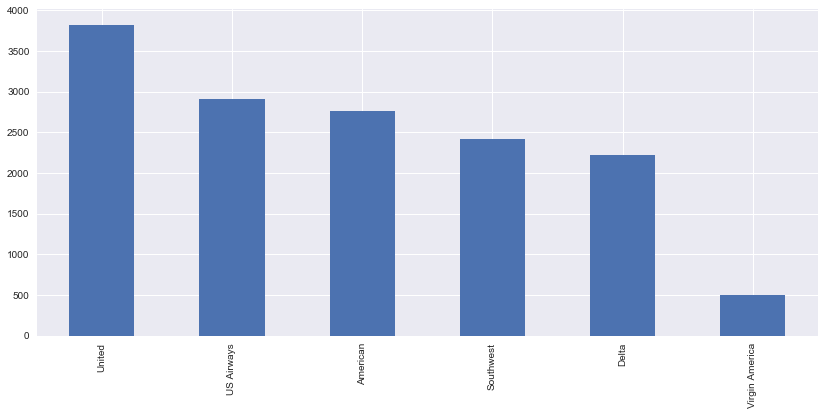

In [141]:
# number of missing values
print df.isnull().sum(axis=0)
print df.airline.value_counts().plot(kind='bar')
print pd.crosstab(df.airline,df.airline_sentiment)

# Feature Engineering 

## Emoji handling 

In [142]:
emojis="😀_❤️_😁_😂_😃_😄_😅_😆_😇_😈_😉_😊_😋_😌_😍_😎_😏_😐_😑_😒_😓_😔_😕_😖_😗_😘_😙_😚_😛_😜_😝_😞_😟_😠_😡_😢_😣_😤_😥_😦_😧_😨_😩_😪_😫_😬_😭_😮_😯_😰_😱_😲_😳_😴_😵_😶_😷_😸_😹_😺_😻_😼_😽_😾_😿_🙀_🙁_🙂_🙃_🙄_🙅_🙆_🙇_🙈_🙉_🙊_🙋_🙌_🙍_🙎_🙏_🚀_🚁_🚂_🚃_🚄_🚅_🚆_🚇_🚈_🚉_🚊_🚋_🚌_🚍_🚎_🚏_🚐_🚑_🚒_🚓_🚔_🚕_🚖_🚗_🚘_🚙_🚚_🚛_🚜_🚝_🚞_🚟_🚠_🚡_🚢_🚣_🚤_🚥_🚦_🚧_🚨_🚩_🚪_🚫_🚬_🚭_🚮_🚯_🚰_🚱_🚲_🚳_🚴_🚵_🚶_🚷_🚸_🚹_🚺_🚻_🚼_🚽_🚾_🚿_🛀_🛁_🛂_🛃_🛄_🛅_🛋_🛌_🛍_🛎_🛏_🛐_🛠_🛡_🛢_🛣_🛤_🛥_🛩_🛫_🛬_🛰_🛳_🤐_🤑_🤒_🤓_🤔_🤕_🤖_🤗_🤘_🦀_🦁_🦂_🦃_🦄_🧀"
emojis_list=emojis.split("_")

# creating emoji columns 
len(df)
df.columns
df=df[['airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'retweet_count', 'text']]
for i in emojis_list:
    df[i]=0


#emojis="😀_❤️_😁_😂_😃_😄_😅_😆_😇_😈_😉_😊_😋_😌_😍_😎_😏_😐_😑_😒_😓_😔_😕_😖_😗_😘_😙_😚_😛_😜_😝_😞_😟_😠_😡_😢_😣_😤_😥_😦_😧_😨_😩_😪_😫_😬_😭_😮_😯_😰_😱_😲_😳_😴_😵_😶"

In [143]:
# converting categorical 'airline' column into dummy variables, each variable for an unique airline
df.airline.head()
df1=pd.concat([df, pd.get_dummies(df.airline, prefix=None, prefix_sep='_')], axis=1, join='inner')
df1.columns
df=df1.ix[:,["airline_sentiment","airline_sentiment_confidence","American","Delta","Southwest","US Airways","United","Virgin America","retweet_count","text"]]

In [144]:
# code to call emojis function
%time emoji_f(df,emojis_list)

Wall time: 1.96 s


In [145]:
df.head()
# Loading vaderSentiment module changes the ouput from notebook to command prompt, \
        #the code below handles it        
nb_stdout = sys.stdout
import nltk.sentiment.util as vaderSentiment
from nltk.sentiment import SentimentIntensityAnalyzer
sys.stdout = nb_stdout


## Loading the positive and negative word dictionary corpus 

In [146]:

pos=pd.read_csv("Positive_Dictionary_Combined.txt",header=None,names=['Positive_Word'],squeeze=False)
neg=pd.read_csv("Negative_Dictionary_Combined.txt",header=None,names=['Negative_Word'],squeeze=False)
# case conversion
pos["Positive_Word"] = pos["Positive_Word"].apply(lambda x: x.lower())
neg["Negative_Word"] = neg["Negative_Word"].apply(lambda x: x.lower())
# dropping the duplicate words, if any!
pos.drop_duplicates(inplace=True)
neg.drop_duplicates(inplace=True)
print "number of postive words in the corpus",len(pos["Positive_Word"])
print "number of negative words in the corpus",len(neg["Negative_Word"] )
#df["text"]=df["text"].str.lower()

number of postive words in the corpus 2167
number of negative words in the corpus 6297


In [147]:
# calculating number of unique postive/negative words present in each tweet \
    # and storing them in columns 'Positive_Word_Flag' & 'Negative_Word_Flag' respectively
% time df["Positive_Word_Flag"]=df["text"].apply(lambda x: len([i for i in x.split(' ') if i.lower() in list(pos["Positive_Word"])]))
% time df["Negative_Word_Flag"]=df["text"].apply(lambda x: len([i for i in x.split(' ') if i.lower() in list(neg["Negative_Word"])]))




Wall time: 19 s
Wall time: 43 s


In [148]:
# Calculating the polarity scores (which comes as a dictionary object) in the tweets using vaderSentiment package and \
    # *storing them in 'Sentiment' column
%time df["Sentiment"] = df["text"].apply(lambda line: SentimentIntensityAnalyzer().polarity_scores(line))

# Extracting the negative, neutral, positive and compund polairty scores from the 'Sentiment' column
df[["Vader_compound","Vader_neg","Vader_neu","Vader_pos"]] = df["Sentiment"].apply(pd.Series)


Wall time: 3min 21s


In [149]:

# Creating column 'Uppercase', which contains the number of specific range upper case words in tweets
df["Uppercase"] = np.nan
df["Uppercase"] = df["text"].apply(lambda line: [np.sum([1 if re.search('[A-Z]{5,}',word) is not None else 0]) for word in line.split(' ')])
df["Uppercase"] = df["Uppercase"].apply(lambda x: np.sum( x))

# Creating 'Special_Characters' column, which contains the number of times [!!* | ??*] appears in the tweet
df["Special_Characters"] = np.nan
#handling  http://, https://, or use \W
df["Special_Characters"] = df["text"].apply(lambda line: [np.sum([1 if re.search('[\!\?\.]{2,}',word.replace("https://","").replace("http://","")) is not None else 0]) for word in line.split(' ')])
df["Special_Characters"] = df["Special_Characters"].apply(lambda x: np.sum(x))





# COME BACK TO THE BELOW CODE AND FIX IT!!!!!!! 

In [150]:
df["Vader_compound"] = df["Vader_compound"].apply(lambda x: abs(x))

# converting text to numeric TF 

In [151]:
X=df.ix[:,1:]

y=df.ix[:,[0]]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.20, random_state=42)

## below code handles --- stemming,  tokenizing, stemming

In [152]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()


# Removing numeric characters
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc) if ((len(re.findall(pattern=r'[0-9]',string=w))==0) and len(w)>1))

# v is for one gram tokenizer and v1 is for 2-4 ngram tokenizer

v1=CountVectorizer(stop_words ='english',max_df=.5,min_df=2,encoding ="utf-8",lowercase =True,ngram_range=(2, 4))
v=CountVectorizer(stop_words ='english',max_df=.5,min_df=2,encoding ="utf-8",lowercase =True,analyzer=stemmed_words,token_pattern =r'[a-zA-Z]{3,}')


In [153]:
# fitting the one gram and 2-4 ngram tokenizer
v.fit(X_train.text)
v1.fit(X_train.text)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding='utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(2, 4), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [154]:
# Transforming the text using the fitted tokenizer
X_train_text_TF1=v.transform(X_train.text)
X_test_text_TF1=v.transform(X_test.text)
X_train_text_TF2=v1.transform(X_train.text)
X_test_text_TF2=v1.transform(X_test.text)


In [155]:
#X_train_text_TF1.toarray().shape
#X_test_text_TF1.toarray().shape
#X_train_text_TF2.toarray().shape
X_test_text_TF2.toarray().shape

(2928L, 13377L)

In [156]:
#len(v.get_feature_names())
#len(v1.get_feature_names())

# Creating the dataframe using the matrix of tokens from countvectorizer with its features(unique tokens)
df_train_newX1=pd.DataFrame(X_train_text_TF1.toarray(), columns=v.get_feature_names(),index=X_train.index)
df_train_newX2=pd.DataFrame(X_train_text_TF2.toarray(), columns=v1.get_feature_names(),index=X_train.index)
# merging one gram and ngram features in one dataframe
df_train_newX=df_train_newX1.merge(df_train_newX2,left_index=True,right_index=True)
#len(df_train_newX1.columns)
#len(df_train_newX2.columns)
print "number of columns in train ",len(df_train_newX.columns)


number of columns in train  17378


In [157]:
# Doing the same operation similarily for test dataset
df_test_newX1=pd.DataFrame(X_test_text_TF1.toarray(), columns=v.get_feature_names(),index=X_test.index)
#df_test_newX1.head()
df_test_newX2=pd.DataFrame(X_test_text_TF2.toarray(), columns=v1.get_feature_names(),index=X_test.index)
#df_test_newX2.head()
df_test_newX=df_test_newX1.merge(df_test_newX2,left_index=True,right_index=True)
print "number of columns in test ",len(df_test_newX.columns)

number of columns in test  17378


## merging the TF of tokens features to orginal data frames with manual engineered features

In [158]:
# 'manual1' columns contains whether there is a positive and negative word

X_train['manual1']=((X_train.Positive_Word_Flag >1 ) & (X_train.Negative_Word_Flag >0 ))
X_test['manual1']=((X_test.Positive_Word_Flag >1 ) & (X_test.Negative_Word_Flag >0 ))

words=['thanks','thank','?']
pat = '|'.join(map(re.escape, words))

# 'manual2' columns contains whether there is a 'thanks' or 'thank' word and atleast one negative word
X_train['manual2']=((X_train.text.str.contains(pat) ) & (X_train.Negative_Word_Flag >0 ))
X_test['manual12']=((X_test.text.str.contains(pat) ) & (X_test.Negative_Word_Flag >0 ))

# Merging into one complete train, test dataframe
X_train_new = pd.concat([X_train, df_train_newX], axis=1, join='inner')
X_test_new = pd.concat([X_test, df_test_newX], axis=1, join='inner')


# Dropping the 'text' column from both train and test dfs
X_train_new=X_train_new.drop("text",axis=1)
X_test_new=X_test_new.drop("text",axis=1)

In [159]:
X_train_new.head()

,airline_sentiment_confidence,American,Delta,Southwest,US Airways,United,Virgin America,retweet_count,😀,❤️,...,yup new beanie,yup new beanie http,yyz terminal,zero communication,zero entertainment,zero information,zero response,zkatcher bretharold,zone precious,zone precious gems
750,0.6737,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6875,0.6757,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7598,0.6671,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14124,1.0000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6187,0.6883,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
X_train_new.Sentiment.head()
# Dropping 'Sentiment' column from both train and test dataframe
X_train_new.drop(["Sentiment"], 
        axis=1, inplace=True)
X_test_new.drop(["Sentiment"], 
        axis=1, inplace=True)

In [161]:

len(X_train_new.columns)

# Initialize the class
clf1 = MultinomialNB()

# Fitting the model
%time  clf1.fit(X_train_new, y_train)



Wall time: 2min 9s


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [162]:
# make class predictions on  test data
y_pred_class = clf1.predict(X_test_new)

In [163]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.80669398907103829

In [164]:


# Getting the confusion matrix by passing actual classes and predicted classes    
df_confusion=confustion_matrix(y_test,y_pred_class)


CONFUSION MATRIX


PREDICTED,0,1,2
ACTUAL,,,
0,308,32,119
1,41,243,296
2,24,54,1811


None
Accuracy of the model is 0.8066939891
Precision of positive class('negative sentiment') is 81.3566936208
Recall of positive class('negative sentiment') is 95.8708311276
The f-measure of the model is 88.0194410693


In [165]:
# use this code for just f-measure
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred_class,pos_label=2)[2]

array([ 0.74038462,  0.53465347,  0.88019441])

# Tweets that are negative and are classified as positive 

In [166]:
df_analyze_prediction=pd.concat([X_test.text, y_test,pd.DataFrame(y_pred_class,index=X_test.index)], axis=1, join='inner')
df_analyze_prediction.columns=["text","actual_sentiment","predicted_sentiment"]
df_analyze_prediction.head(2)
df_analyze_prediction.predicted_sentiment.value_counts()
len(df_analyze_prediction)

2928

In [167]:
x=df_analyze_prediction.ix[((df_analyze_prediction.actual_sentiment==2) & (df_analyze_prediction.predicted_sentiment==0)),"text"]
len(x)
x.values

array([ '@united thanks for having ground crews that are surprised when flights arrive. #beingsuckontarmacsucks!',
       '@united thanks for the reply. To clarify, the airfare is similar to your likely intended peer group. The $3 beer charge, however, is not',
       '@USAirways suggest you failures make a HUGE donation to @the_USO  Charlotte, NC as THEY provided GREAT customer service today, unlike you.',
       '&lt;3 &lt;3 RT @SouthwestAir! @danihampton Sorry to hear about the WiFi connection, Dani. Please DM us your conf # so we can help you. Thanks!',
       "@AmericanAir a confirmed flight. I'm so done! Thanks for nothing!",
       '@united nice. I wonder how you pick who to respond to? Maybe only happy customers are easier. I wonder how many of those you have left.',
       "\xe2\x80\x9c@AmericanAir: @Dumas2TTG Good morning, Tamara. We'll try to get you comfortably on a flight as soon as we can.\xe2\x80\x9d#NoXTraLegRoom #NoCoatCloset",
       '@USAirways No thank you. @America

# Tweets that are negative and are classified as neutral 

In [168]:
x=df_analyze_prediction.ix[((df_analyze_prediction.actual_sentiment==2) & (df_analyze_prediction.predicted_sentiment==1)),"text"]

x.values

array([ 'Includes @KCIAirport \xe2\x80\x9c@SouthwestAir: Inclement weather may impact scheduled service in. ReFlight Booking Problems options available: http://t.co/KeyrpFlHil\xe2\x80\x9d',
       '@JetBlue it seems I never received an ID, just a password.',
       '@united how come a $27 shuttle bus from LGA to EWR has electrical power outlets but our new Airbus interiors do not? #whyjeff?',
       '@JetBlue your gif game is strong.',
       "@JetBlue looks like their inflatable car seats got left on the plane, so I guess they'll be back sometime!! #savethoseseats",
       '@united Club DEN, East or West, both are disgusting. http://t.co/XijYrPsLZK',
       '@united Not a happy flyer.  UA flight 1161 from SFO to Cleveland.  Sunday 2/22.  Stay tuned for blog article from http://t.co/VdFdODqVGx',
       "@SouthwestAir looks like you are up and running for the day. Still can't get through on the phone. Can you follow so I can dm you my info",
       "\xe2\x80\x9c@JetBlue: Our fleet's on 